# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Dataset

In [29]:
df = pd.read_csv('/content/drive/MyDrive/AIML_PRACTICE/time series/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [31]:
df.rename(columns = {'DATE':'Date','IPG2211A2N':'IP'},inplace=True)

In [32]:
df.columns

Index(['Date', 'IP'], dtype='object')

In [33]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    397 non-null    datetime64[ns]
 1   IP      397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [34]:
df.isna().sum()


,0
Date,0
IP,0


In [37]:
df = df.set_index(df['Date'])

In [38]:
df

,Date,IP
Date,,
1985-01-01,1985-01-01,72.5052
1985-02-01,1985-02-01,70.6720
1985-03-01,1985-03-01,62.4502
1985-04-01,1985-04-01,57.4714
1985-05-01,1985-05-01,55.3151
...,...,...
2017-09-01,2017-09-01,98.6154
2017-10-01,2017-10-01,93.6137
2017-11-01,2017-11-01,97.3359


# Visualizing the production of electricity


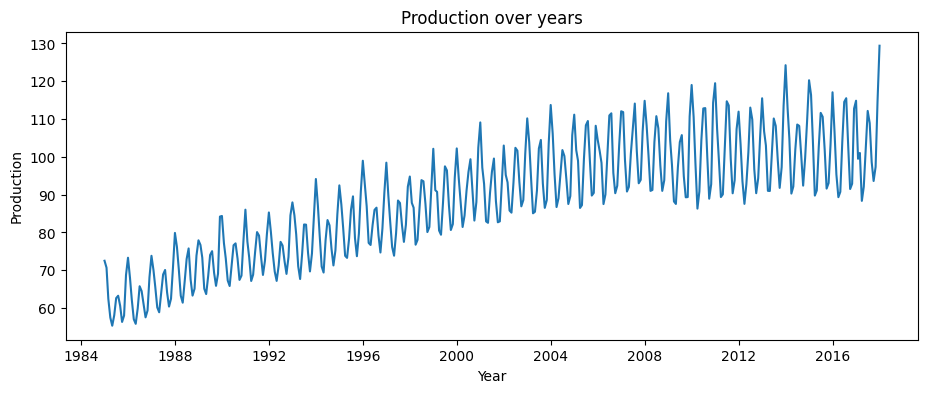

In [44]:
plt.figure(figsize=(11,4))
plt.plot(df['IP'])
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Production over years')
plt.show()

# Checking for differencing

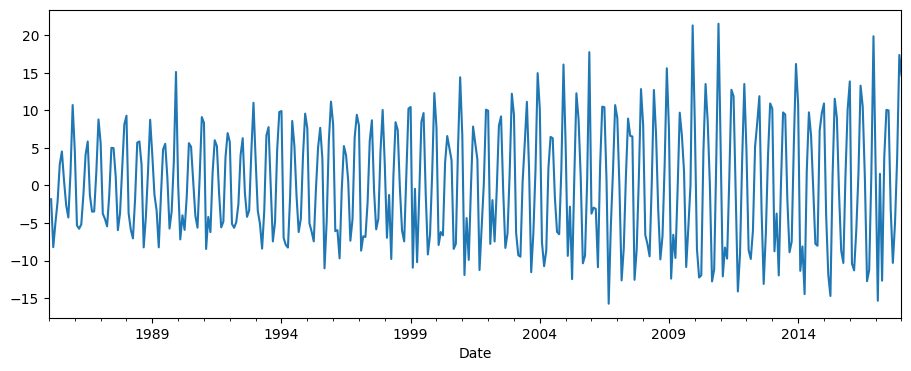

In [45]:
diff = df['IP'].diff()
diff.plot(figsize=(11,4))
plt.show()

# Checking for stationarity

In [46]:
results = adfuller(df['IP'])
print(f'p-value: {results[1]}')

p-value: 0.1862146911658712


# since p-value is less than 0.05 so in p d q value of d = 0

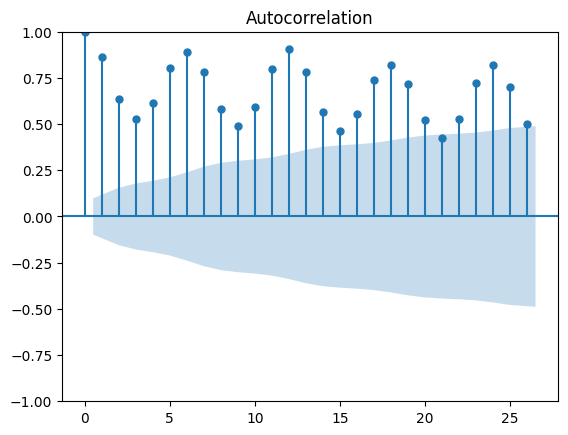

In [47]:
plot_acf(df['IP'])
plt.show()

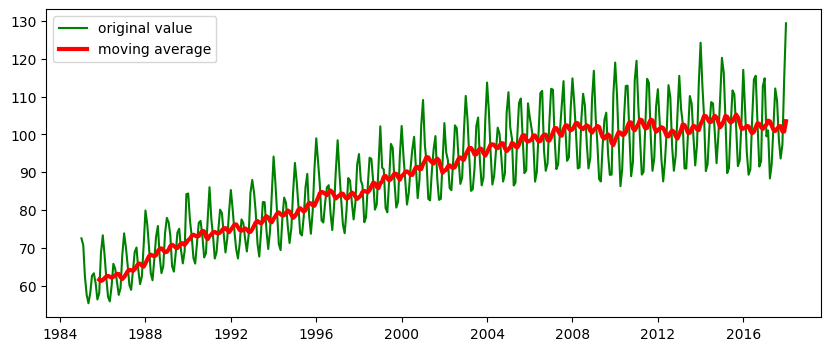

In [51]:
rolling_mean = df['IP'].rolling(window=11).mean()
plt.figure(figsize=(10,4))
plt.plot(df['IP'],label = 'original value',color='green')
plt.plot(rolling_mean,label='moving average',lw = 3,color='red')
plt.legend()
plt.show()

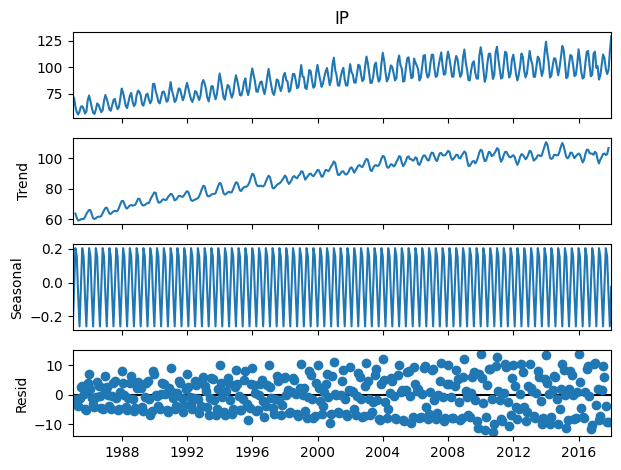

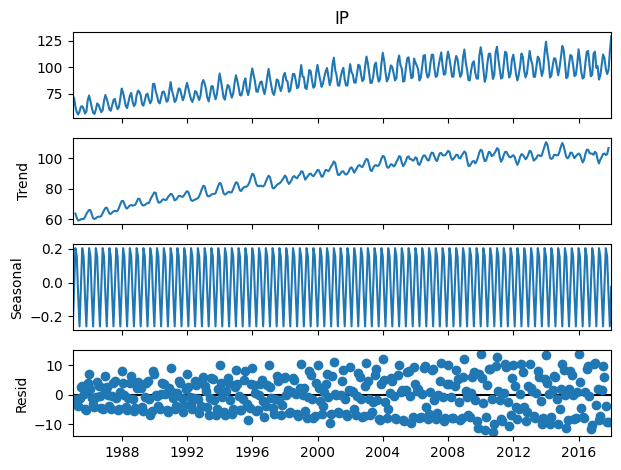

In [54]:
decomp = seasonal_decompose(df['IP'],model='additive',period=5)
decomp.plot()


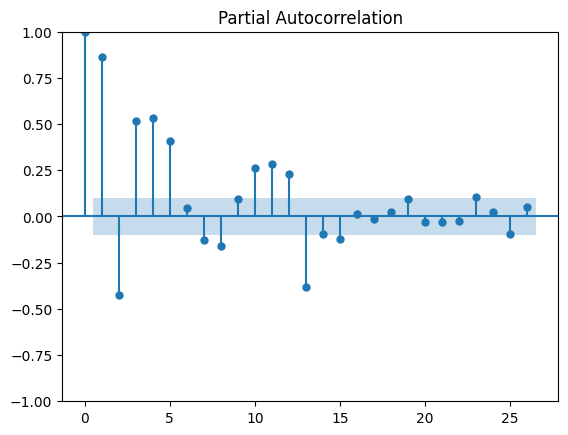

In [48]:
plot_pacf(df['IP'])
plt.show()

# From above observation q = either 0 or 1 and p will be 5

# Building Forecasting model

In [49]:
model = ARIMA(df['IP'],order=(5,0,1))
fit_model = model.fit()
print(fit_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     IP   No. Observations:                  397
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1105.385
Date:                Sat, 31 Jan 2026   AIC                           2226.769
Time:                        07:08:59   BIC                           2258.641
Sample:                    01-01-1985   HQIC                          2239.394
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.8412     15.281      5.814      0.000      58.892     118.791
ar.L1          1.0584      0.109      9.717      0.000       0.845       1.272
ar.L2         -0.5287      0.138     -3.845      0.0

In [58]:
future_dates = pd.date_range(start='2018-01-01',periods=20,freq='YS')
future_dates

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01',
               '2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01',
               '2030-01-01', '2031-01-01', '2032-01-01', '2033-01-01',
               '2034-01-01', '2035-01-01', '2036-01-01', '2037-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [59]:
forecast = fit_model.forecast(steps=20)
forecast.set_index = future_dates


# Plotting the Forecasted Data

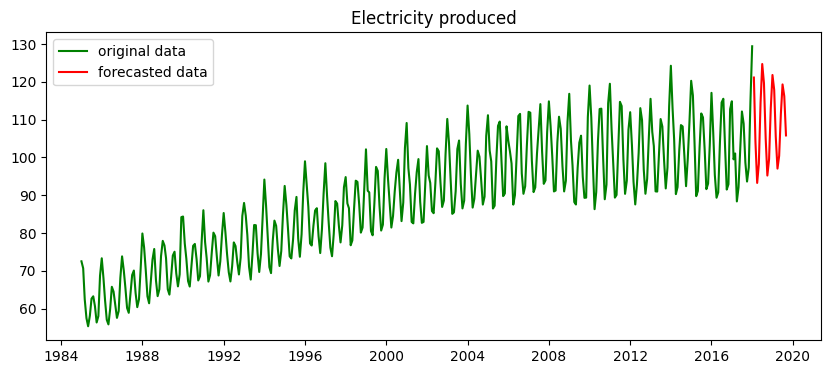

In [61]:
plt.figure(figsize=(10,4))
plt.plot(df['IP'],label = 'original data',color='green')
plt.plot(forecast,label='forecasted data',color = 'red')
plt.legend()
plt.title('Electricity produced')
plt.show()